# Notebook demonstrating fitting of $hrz0$ to site data
The below code shows how to use data from fixed-tilt experiments to compute the free parameter $hrz0$. The dust distribution is currently assumed and its parameters are defined in the file `parameters_qut_experiments.xlsx`.

In [1]:
import numpy as np
import soiling_model as sm
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import (rcParams,dates)
import pickle
import copy
rcParams['figure.figsize'] = (30, 5)

mle_save_file = "results/mle_fitting_results"
reflectometer_angle = 15 # angle of incidence of reflectometer
k_factor = 2.404 # calibration factor for TSP measurements in experiments
second_surf = False # use first surface model
d = "data/qut_experiments/"
files = ['experiment_20170807_20170811_cinque.xlsx','experiment_20170828_20170901_cinque.xlsx',\
    'experiment_20170905_20170913_cinque.xlsx','experiment_20170915_20170921_cinque.xlsx']
parameter_file = d+"parameters_qut_experiments.xlsx"

## Multiple experiment fitting example

In [2]:
train_experiments = [0,1] # indices for training experiments from 0 to len(files)
train_mirrors = ["Mirror_1","Mirror_2"] # which mirrors within the experiments are used for training
files_experiment = [d+files[ii] for ii in range(len(files))]
Nfiles = len(files_experiment)
k_factors = [k_factor]*Nfiles
incidence_angle = [15.0]*Nfiles
extract = lambda x,ind: [x[ii] for ii in ind]
files_experiment_train = extract(files_experiment,train_experiments)
k_factors_train = extract(k_factors,train_experiments)
incidence_angle_train = extract(incidence_angle,train_experiments)
t = [t+1 for t in train_experiments]
training_string = "Training: "+str(train_mirrors)+", Exp: "+str(t)

imodel = sm.fitting_experiment(parameter_file)
sim_data_train = sm.simulation_inputs(files_experiment_train,k_factors=k_factors_train,dust_type="TSP")
reflect_data_train = sm.reflectance_measurements(files_experiment_train,sim_data_train.time,number_of_measurements=9.0,\
    reflectometer_incidence_angle=incidence_angle_train,import_tilts=True,column_names_to_import=train_mirrors)

sim_data_total = sm.simulation_inputs(files_experiment,k_factors=k_factors,dust_type="TSP")
reflect_data_total = sm.reflectance_measurements(files_experiment,sim_data_total.time,number_of_measurements=9.0,\
    reflectometer_incidence_angle=incidence_angle,import_tilts=True,column_names_to_import=None)


Importing constants
Importing dust
Importing site data (weather,time). Using dust_type = TSP, test_length = 102 hours
Length of simulation for file data/qut_experiments/experiment_20170807_20170811_cinque.xlsx: 4.0 days
No DNI data to import. Skipping.
No rain intensity data to import.
Importing site data (weather,time). Using dust_type = TSP, test_length = 96 hours
Length of simulation for file data/qut_experiments/experiment_20170828_20170901_cinque.xlsx: 4.0 days
No DNI data to import. Skipping.
No rain intensity data to import.
Importing site data (weather,time). Using dust_type = TSP, test_length = 102 hours
Length of simulation for file data/qut_experiments/experiment_20170807_20170811_cinque.xlsx: 4.0 days
No DNI data to import. Skipping.
No rain intensity data to import.
Importing site data (weather,time). Using dust_type = TSP, test_length = 96 hours
Length of simulation for file data/qut_experiments/experiment_20170828_20170901_cinque.xlsx: 4.0 days
No DNI data to import. Ski

Fitting. Use training data only.

In [3]:
imodel.helios_angles(sim_data_train,reflect_data_train,second_surface=second_surf)
hrz0_multi,sse_multi = imodel.fit_hrz0_least_squares(sim_data_train,reflect_data_train)
imodel.update_model_parameters(hrz0_multi)

Setting tilts for 2 experiments
First surface model
First surface model
Fitting hrz0 with least squares ...
... done! 
 hrz0 = 2.0910890752850535


Setting tilts for 4 experiments
First surface model
First surface model
First surface model
First surface model
No value for hrz0 supplied. Using value in self.hrz0 = 2.0910890752850535.
Calculating deposition velocity for each of the 4 simulations
Calculating adhesion/removal balance
  No common stow_tilt. Use values in helios.tilt to compute removal moments. This might take some time.
  No common stow_tilt. Use values in helios.tilt to compute removal moments. This might take some time.
  No common stow_tilt. Use values in helios.tilt to compute removal moments. This might take some time.
  No common stow_tilt. Use values in helios.tilt to compute removal moments. This might take some time.
Calculating soil deposited in a timestep [m^2/m^2]


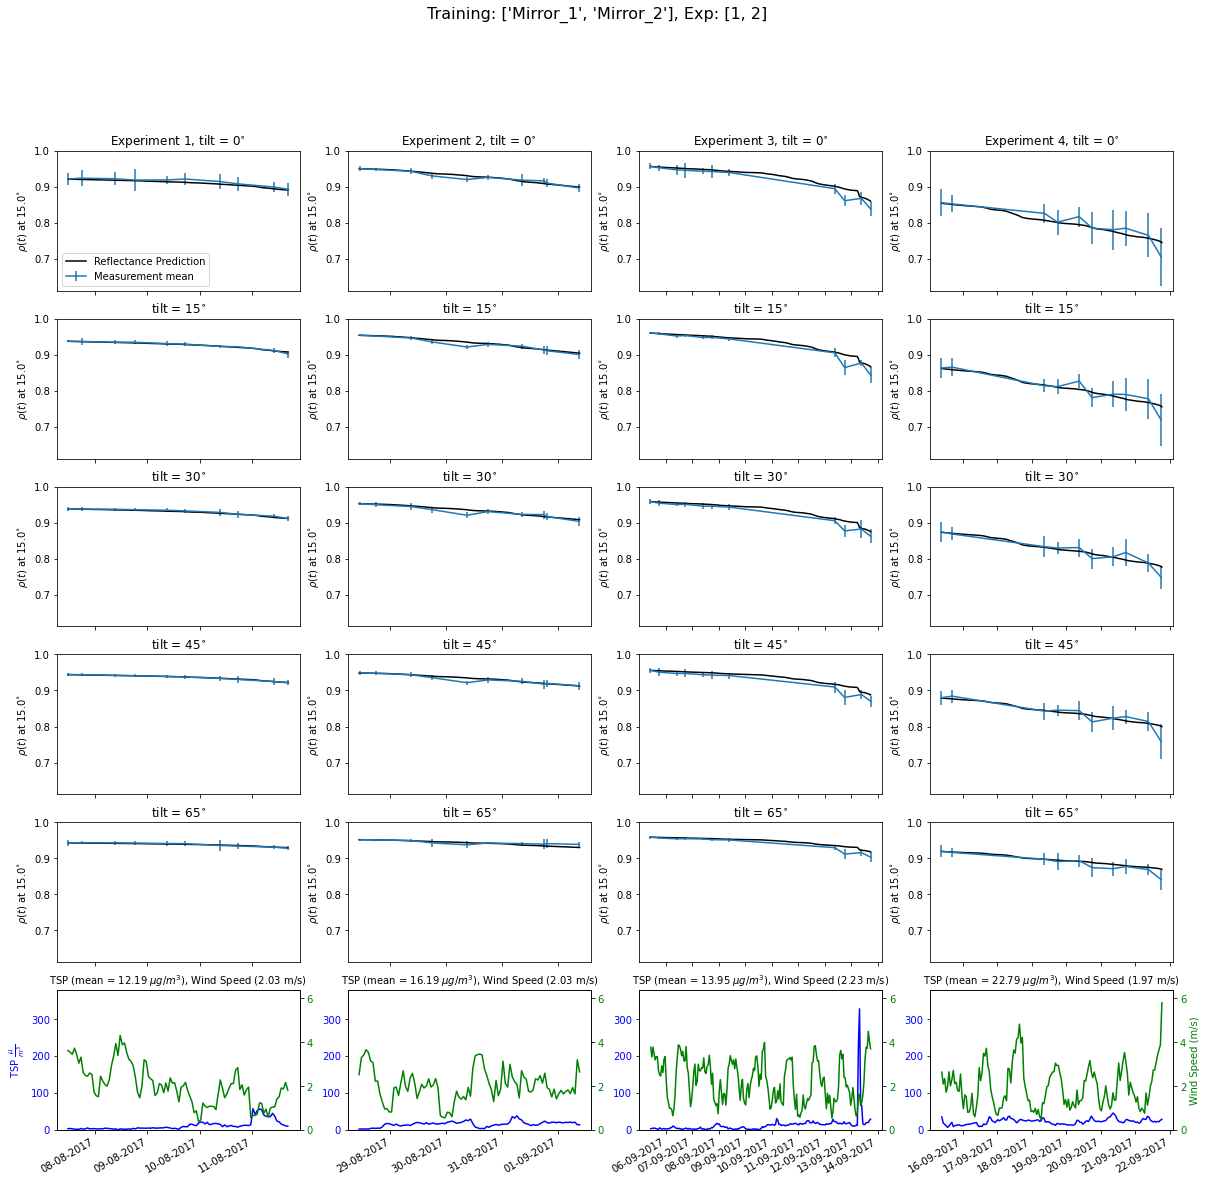

In [4]:
imodel.helios_angles(sim_data_total,reflect_data_total,second_surface=second_surf)
imodel.predict_reflectance(sim_data_total)
imodel.plot_soiling_factor(sim_data_total,reflectance_data=reflect_data_total,figsize=(20,20),reflectance_std='measurements',fig_title=training_string);